Archive:  /content/Dataset.zip
   creating: Dataset/
  inflating: Dataset/1.jpg           
  inflating: Dataset/10.jpg          
  inflating: Dataset/100.jpg         
  inflating: Dataset/101.jpg         
  inflating: Dataset/102.jpg         
  inflating: Dataset/103.jpg         
  inflating: Dataset/104.jpg         
  inflating: Dataset/105.jpg         
  inflating: Dataset/106.jpg         
  inflating: Dataset/107.jpg         
  inflating: Dataset/108.jpg         
  inflating: Dataset/109.jpg         
  inflating: Dataset/11.jpg          
  inflating: Dataset/110.jpg         
  inflating: Dataset/111.jpg         
  inflating: Dataset/112.jpg         
  inflating: Dataset/113.jpg         
  inflating: Dataset/114.jpg         
  inflating: Dataset/115.jpg         
  inflating: Dataset/116.jpg         
  inflating: Dataset/117.jpg         
  inflating: Dataset/118.jpg         
  inflating: Dataset/119.jpg         
  inflating: Dataset/12.jpg          
  inflating: Dataset/120.jpg       

In [5]:
!pip install Pillow==9.5.0

zsh:1: command not found: pip


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from tqdm import tqdm
import random

# Suppress TensorFlow warnings for cleaner output
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)



In [3]:
# 1. Parameters
IMAGE_HEIGHT = 128          # Height to resize images
IMAGE_WIDTH = 128           # Width to resize images
IMAGE_CHANNELS = 1          # 1 for grayscale, 3 for RGB
DATASET_PATH = '/Users/hemangjindal/Downloads/Dataset'    # Path to your Dataset folder
BATCH_SIZE = 4
NOISE_FACTOR = 0.05         # 5% of pixels will be noisy
NUM_DISPLAY_IMAGES = 5     # Number of images to display


## Preprocessing

In [8]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

# 2. Load Images
def load_images_from_folder(folder, image_size=(128, 128), color_mode='RGB'):
    """
    Loads and preprocesses images from a specified folder.

    Parameters:
        folder (str): Path to the folder containing images.
        image_size (tuple): Desired image size (width, height).
        color_mode (str): 'RGB' or 'L' for grayscale.

    Returns:
        images (numpy.ndarray): Array of loaded and preprocessed images.
    """
    images = []
    valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')
    image_files = [os.path.join(folder, file) for file in os.listdir(folder)
                   if file.lower().endswith(valid_extensions)]
    print(f"Found {len(image_files)} images in '{folder}'.")

    for img_path in tqdm(image_files, desc="Loading images"):
        try:
            img = Image.open(img_path)
            if color_mode == 'L':
                img = img.convert('L')  # Convert to grayscale
            else:
                img = img.convert('RGB')  # Convert to RGB
            img = img.resize(image_size, Image.ANTIALIAS)
            img_array = np.array(img).astype('float32') / 255.0  # Normalize to [0, 1]

            # If loading in grayscale, ensure a single channel
            if color_mode == 'L':
                img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension (shape becomes H, W, 1)

            images.append(img_array)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")

    images = np.array(images)
    print(f"Loaded images shape: {images.shape}")
    return images

# Load images as grayscale
images = load_images_from_folder(DATASET_PATH, image_size=(IMAGE_WIDTH, IMAGE_HEIGHT), color_mode='L')


Found 120 images in '/Users/hemangjindal/Downloads/Dataset'.


Loading images:  21%|██        | 25/120 [00:00<00:00, 243.74it/s]

Error loading /Users/hemangjindal/Downloads/Dataset/63.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/77.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/88.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/89.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/76.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/62.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/74.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/60.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/48.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangj

Loading images:  52%|█████▏    | 62/120 [00:00<00:00, 317.16it/s]

Error loading /Users/hemangjindal/Downloads/Dataset/36.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/22.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'


Loading images: 100%|██████████| 120/120 [00:00<00:00, 300.46it/s]

Error loading /Users/hemangjindal/Downloads/Dataset/23.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/37.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/33.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/27.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/26.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/32.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/18.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/24.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangjindal/Downloads/Dataset/30.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error loading /Users/hemangj

In [ ]:
# 3. Split into Train and Test
x_train, x_test = train_test_split(images, test_size=0.2, random_state=42)
print(f"Training set shape: {x_train.shape}")
print(f"Testing set shape: {x_test.shape}")


Training set shape: (96, 128, 128, 1)
Testing set shape: (24, 128, 128, 1)


In [ ]:

import random
import numpy as np
from tqdm import tqdm

# 4. Add Salt and Pepper Noise
def add_salt_and_pepper_noise(images, noise_amount=0.1):
    """
    Adds salt and pepper noise to grayscale images.

    Parameters:
        images (numpy.ndarray): Input images with pixel values in [0, 1] and shape (N, H, W, 1).
        noise_amount (float): Proportion of image pixels to replace with noise.

    Returns:
        noisy_images (numpy.ndarray): Noisy images.
    """
    noisy_images = images.copy()
    num_total_pixels = images.shape[1] * images.shape[2]  # H * W
    num_noisy_pixels = int(noise_amount * num_total_pixels)

    for idx in tqdm(range(noisy_images.shape[0]), desc="Adding noise"):
        for _ in range(num_noisy_pixels):
            x_coord = random.randint(0, images.shape[1] - 1)  # Random x-coordinate
            y_coord = random.randint(0, images.shape[2] - 1)  # Random y-coordinate

            # Since we are dealing with grayscale images, channel is always 0
            channel = 0

            # Randomly decide to add salt or pepper
            if random.random() < 0.5:
                noisy_images[idx, x_coord, y_coord, channel] = 1.0  # Salt (white pixel)
            else:
                noisy_images[idx, x_coord, y_coord, channel] = 0.0  # Pepper (black pixel)

    return noisy_images

# Assuming x_train and x_test are already in the shape (N, H, W, 1)
# Add noise to training and testing sets
x_train_noisy = add_salt_and_pepper_noise(x_train, noise_amount=NOISE_FACTOR)
x_test_noisy = add_salt_and_pepper_noise(x_test, noise_amount=NOISE_FACTOR)

print(f"Noisy training set shape: {x_train_noisy.shape}")
print(f"Noisy testing set shape: {x_test_noisy.shape}")


Adding noise: 100%|██████████| 24/24 [00:00<00:00, 135.27it/s]

Noisy training set shape: (96, 128, 128, 1)
Noisy testing set shape: (24, 128, 128, 1)


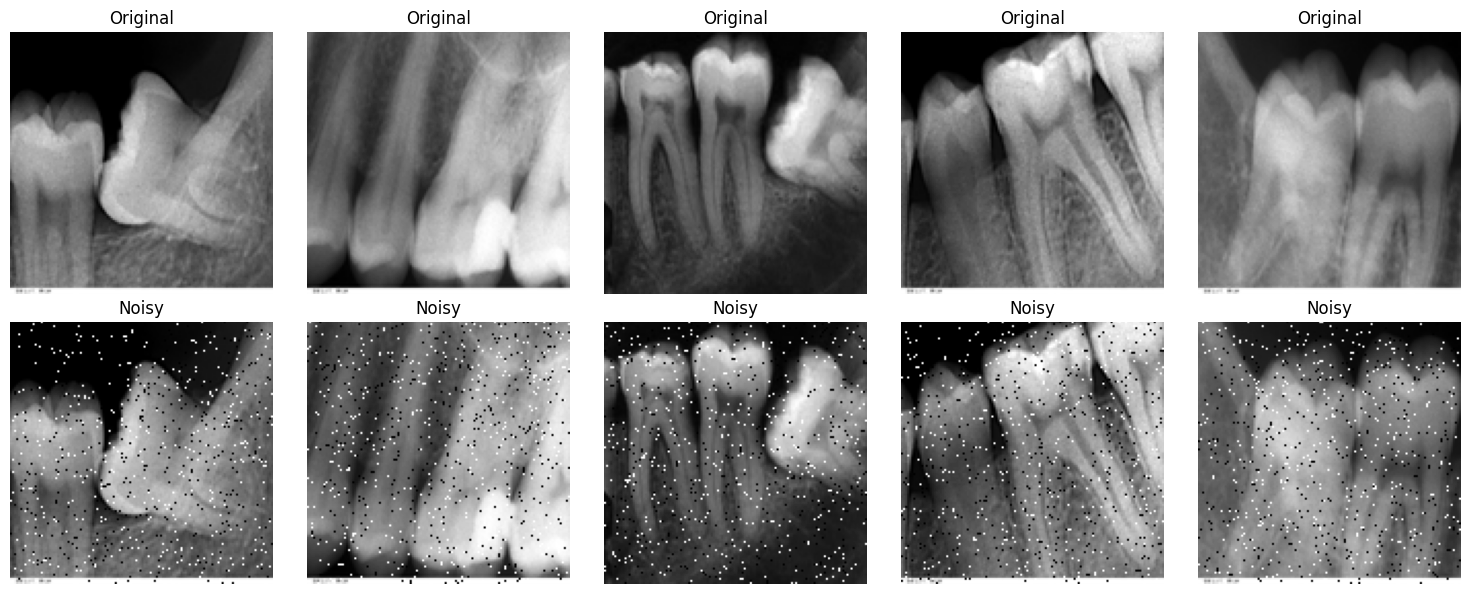

In [ ]:

# 5. Display Original and Noisy Images
def display_original_vs_noisy(original, noisy, num=5):
    """
    Displays original and noisy images side by side.

    Parameters:
        original (numpy.ndarray): Original clean images.
        noisy (numpy.ndarray): Noisy images.
        num (int): Number of image pairs to display.
    """
    plt.figure(figsize=(15, 6))
    for i in range(num):
        # Original Image
        ax = plt.subplot(2, num, i + 1)
        if IMAGE_CHANNELS == 1:
            plt.imshow(original[i].squeeze(), cmap='gray')
        else:
            plt.imshow(original[i])
        plt.title("Original")
        plt.axis('off')

        # Noisy Image
        ax = plt.subplot(2, num, i + 1 + num)
        if IMAGE_CHANNELS == 1:
            plt.imshow(noisy[i].squeeze(), cmap='gray')
        else:
            plt.imshow(noisy[i])
        plt.title("Noisy")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display
display_original_vs_noisy(x_test, x_test_noisy, num=NUM_DISPLAY_IMAGES)


In [ ]:
# 7. Prepare Training and Validation Sets
x_train_noisy_train, x_train_noisy_val, x_train_clean_train, x_train_clean_val = train_test_split(
    x_train_noisy, x_train, test_size=0.1, random_state=42
)

print(f"Training set shape: {x_train_noisy_train.shape}")
print(f"Validation set shape: {x_train_noisy_val.shape}")


Training set shape: (86, 128, 128, 1)
Validation set shape: (10, 128, 128, 1)


##Model Implementation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
import cv2

# Build U-Net Autoencoder
def build_unet_autoencoder(input_shape):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    # Decoder with skip connections
    u5 = UpSampling2D((2, 2))(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Instantiate the model
input_shape = (128, 128, 1)  # Adjust input size as per your dataset
autoencoder = build_unet_autoencoder(input_shape)


In [ ]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

# Function to convert grayscale (1 channel) to RGB (3 channels)
def grayscale_to_rgb(images):
    return tf.image.grayscale_to_rgb(images)

# Modify the perceptual loss to handle grayscale images
def perceptual_loss(y_true, y_pred):
    # Convert grayscale images to RGB for VGG16
    y_true_rgb = grayscale_to_rgb(y_true)
    y_pred_rgb = grayscale_to_rgb(y_pred)

    # Get features from VGG16 for both true and predicted images
    y_true_features = vgg(y_true_rgb)
    y_pred_features = vgg(y_pred_rgb)

    # Calculate the perceptual loss
    return K.mean(K.square(y_true_features - y_pred_features))

# Compile the model with the updated loss function
autoencoder.compile(optimizer='adam', loss=perceptual_loss)


In [ ]:
autoencoder.fit(x_train_noisy_train, x_train_clean_train, validation_data=(x_train_noisy_val, x_train_clean_val), epochs=15, batch_size=4, validation_split=0.2)


Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - loss: 0.0489 - val_loss: 0.0312
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0235 - val_loss: 0.0197
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0166 - val_loss: 0.0129
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0115 - val_loss: 0.0077
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0075 - val_loss: 0.0054
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0059 - val_loss: 0.0043
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 9/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 10/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 11/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 12/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.00

##Evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


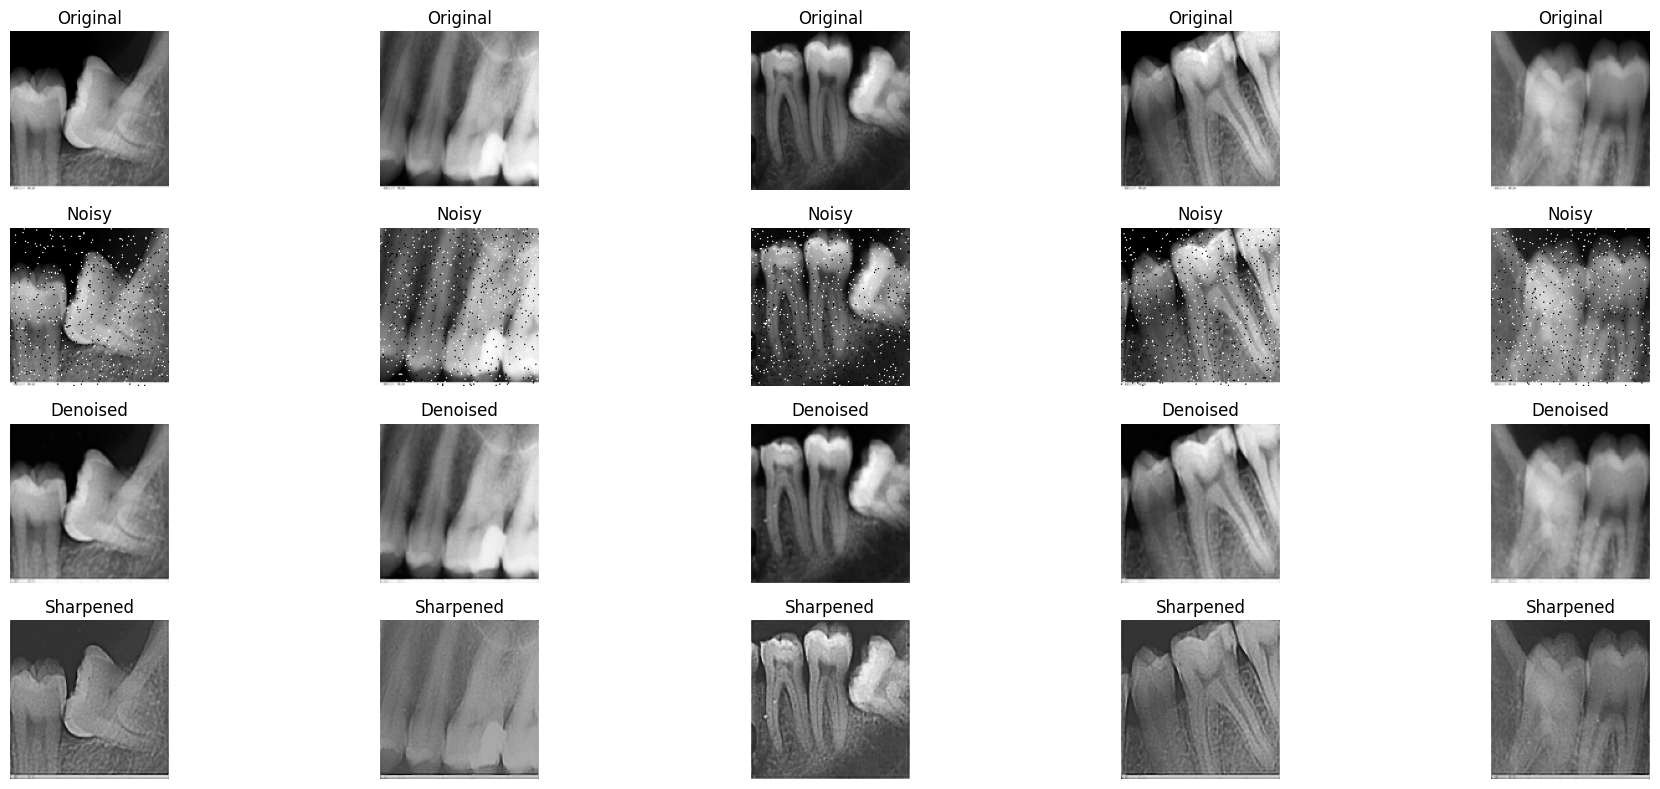

In [ ]:
import cv2
import numpy as np

# Sharpening function
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

# 11. Denoise Test Images
denoised_images = autoencoder.predict(x_test_noisy)

# Sharpen the denoised images
sharpened_images = np.array([sharpen_image(denoised_images[i]) for i in range(len(denoised_images))])

# 12. Display Denoised and Sharpened Images
def display_denoised_images(original, noisy, denoised, sharpened, num=5):
    """
    Displays original, noisy, denoised, and sharpened images side by side.

    Parameters:
        original (numpy.ndarray): Original clean images.
        noisy (numpy.ndarray): Noisy images.
        denoised (numpy.ndarray): Denoised images.
        sharpened (numpy.ndarray): Sharpened denoised images.
        num (int): Number of image sets to display.
    """
    plt.figure(figsize=(20, 8))
    for i in range(num):
        # Original Image
        ax = plt.subplot(4, num, i + 1)
        if IMAGE_CHANNELS == 1:
            plt.imshow(original[i].squeeze(), cmap='gray')
        else:
            plt.imshow(original[i])
        plt.title("Original")
        plt.axis('off')

        # Noisy Image
        ax = plt.subplot(4, num, i + 1 + num)
        if IMAGE_CHANNELS == 1:
            plt.imshow(noisy[i].squeeze(), cmap='gray')
        else:
            plt.imshow(noisy[i])
        plt.title("Noisy")
        plt.axis('off')

        # Denoised Image
        ax = plt.subplot(4, num, i + 1 + 2*num)
        if IMAGE_CHANNELS == 1:
            plt.imshow(denoised[i].squeeze(), cmap='gray')
        else:
            plt.imshow(denoised[i])
        plt.title("Denoised")
        plt.axis('off')

        # Sharpened Image
        ax = plt.subplot(4, num, i + 1 + 3*num)
        if IMAGE_CHANNELS == 1:
            plt.imshow(sharpened[i].squeeze(), cmap='gray')
        else:
            plt.imshow(sharpened[i])
        plt.title("Sharpened")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display the images
display_denoised_images(x_test, x_test_noisy, denoised_images, sharpened_images, num=NUM_DISPLAY_IMAGES)



In [ ]:

# 13. Evaluate Performance
def evaluate_denoising(original, denoised):
    """
    Evaluates denoising performance using PSNR and SSIM.

    Parameters:
        original (numpy.ndarray): Original clean image.
        denoised (numpy.ndarray): Denoised image.

    Returns:
        psnr (float): Peak Signal-to-Noise Ratio.
        ssim (float): Structural Similarity Index Measure.
    """
    # Ensure the images are in the correct format
    if IMAGE_CHANNELS == 1:
        original = original.squeeze()
        denoised = denoised.squeeze()

    psnr = peak_signal_noise_ratio(original, denoised, data_range=1.0)
    ssim = structural_similarity(original, denoised, multichannel=(IMAGE_CHANNELS > 1), data_range=1.0)
    return psnr, ssim

# Calculate average PSNR and SSIM over the test set
total_psnr = 0
total_ssim = 0
num_images = x_test.shape[0]

for i in tqdm(range(num_images), desc="Evaluating"):
    psnr, ssim = evaluate_denoising(x_test[i], denoised_images[i])
    total_psnr += psnr
    total_ssim += ssim

avg_psnr = total_psnr / num_images
avg_ssim = total_ssim / num_images

print(f"Average PSNR: {avg_psnr:.2f} dB")
print(f"Average SSIM: {avg_ssim:.4f}")



Evaluating: 100%|██████████| 24/24 [00:00<00:00, 624.48it/s]

Average PSNR: 30.85 dB
Average SSIM: 0.9470


In [ ]:
# 15. (Optional) Save Evaluation Metrics
import pandas as pd

# Store PSNR and SSIM for each image
psnr_list = []
ssim_list = []

for i in tqdm(range(num_images), desc="Collecting Metrics"):
    psnr, ssim = evaluate_denoising(x_test[i], denoised_images[i])
    psnr_list.append(psnr)
    ssim_list.append(ssim)

# Create a DataFrame
metrics_df = pd.DataFrame({
    'Image_Index': range(num_images),
    'PSNR': psnr_list,
    'SSIM': ssim_list
})

# Save to CSV
metrics_df.to_csv('denoising_metrics.csv', index=False)
print("Denoising metrics saved to 'denoising_metrics.csv'.")


Denoising metrics saved to 'denoising_metrics.csv'.


In [ ]:
# Save the autoencoder model
autoencoder.save('denoising_autoencoder_model.h5')


###Image Testing

In [ ]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

# Function to convert grayscale (1 channel) to RGB (3 channels)
def grayscale_to_rgb(images):
    return tf.image.grayscale_to_rgb(images)

# Modify the perceptual loss to handle grayscale images
def perceptual_loss(y_true, y_pred):
    # Convert grayscale images to RGB for VGG16
    y_true_rgb = grayscale_to_rgb(y_true)
    y_pred_rgb = grayscale_to_rgb(y_pred)

    # Get features from VGG16 for both true and predicted images
    y_true_features = vgg(y_true_rgb)
    y_pred_features = vgg(y_pred_rgb)

    # Calculate the perceptual loss
    return K.mean(K.square(y_true_features - y_pred_features))

In [ ]:
from keras.models import load_model

# Load the saved autoencoder model
autoencoder = load_model('/content/denoising_autoencoder_model.h5', custom_objects={'perceptual_loss': perceptual_loss})


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply a sharpening filter to the image
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])  # Simple sharpening kernel
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    # Load image in grayscale (if necessary, modify for RGB)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize to (128, 128) as expected by the model
    img = cv2.resize(img, (128, 128))

    # Normalize the image
    img = img.astype('float32') / 255.0

    # Expand dimensions to match the model's expected input shape (1, 128, 128, 1)
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)

    return img

# Load and preprocess a new noisy image
new_noisy_image = load_and_preprocess_image('path_to_your_noisy_image.png') ## ADD PATH OF YOUR NOISY IMAGE TO TEST

# Predict the denoised image
denoised_image = autoencoder.predict(new_noisy_image)

# Reshape the denoised image for display
denoised_image = denoised_image.squeeze()  # Remove single-dimensional entries

# Apply sharpening filter to the denoised image
sharpened_image = sharpen_image(denoised_image)

# Function to display original, noisy, denoised, and sharpened images
def display_comparison(original, noisy, denoised, sharpened):
    plt.figure(figsize=(20, 6))

    # Original noisy image
    plt.subplot(1, 4, 1)
    plt.imshow(original.squeeze(), cmap='gray')
    plt.title("Noisy Image")
    plt.axis('off')

    # Denoised image
    plt.subplot(1, 4, 2)
    plt.imshow(denoised.squeeze(), cmap='gray')
    plt.title("Denoised Image")
    plt.axis('off')

    # Sharpened image
    plt.subplot(1, 4, 3)
    plt.imshow(sharpened.squeeze(), cmap='gray')
    plt.title("Sharpened Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Reshape original noisy image for display
new_noisy_image_display = new_noisy_image.squeeze()

# Display all images: Noisy, Denoised, Sharpened
display_comparison(new_noisy_image_display, new_noisy_image_display, denoised_image, sharpened_image)
